In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn import metrics

import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# Đọc dữ liệu đầu vào
with open ('titanic.csv') as f:
    df = pd.read_csv(f, dtype={'age': np.float64, 'sibsp': np.int64, 'parch': np.int64})

In [12]:
df

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [17]:
# xóa đi các thuộc tính body, cabin, boat, home.dest 
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

for dataset in [df]:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
#we can now drop the cabin feature
df = df.drop(['Cabin'], axis=1)

In [18]:
# Thực hiện xóa các thuộc tính không cần thiết.
df = df.drop(['Ticket'], axis=1)
df = df.drop(['Boat'], axis=1)
df = df.drop(['Body'], axis=1)
df = df.drop(['Home.dest'], axis=1)

In [19]:
# Điền giá trị còn thiếu vào thuộc tính tuổi (age).
for dataset in [df]:
    mean = df["Age"].mean()
    std = df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    #compute random numbers between the mea, std and is null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    #fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)]= rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = df["Age"].astype(int)
df["Age"].isnull().sum()

0

In [20]:
# Thống kê các mẫu dữ liệu theo giới tính
df['Sex']

0       female
1         male
2       female
3         male
4       female
         ...  
1304    female
1305    female
1306      male
1307      male
1308      male
Name: Sex, Length: 1309, dtype: object

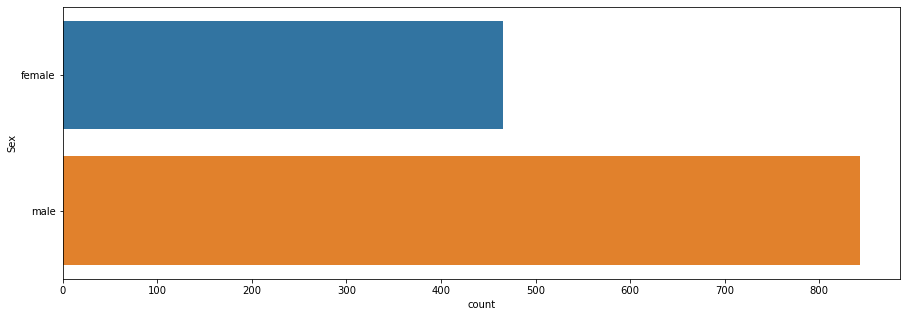

In [21]:
plt.figure(1, figsize = (15,5))
sns.countplot(y = 'Sex', data = df)
plt.show()

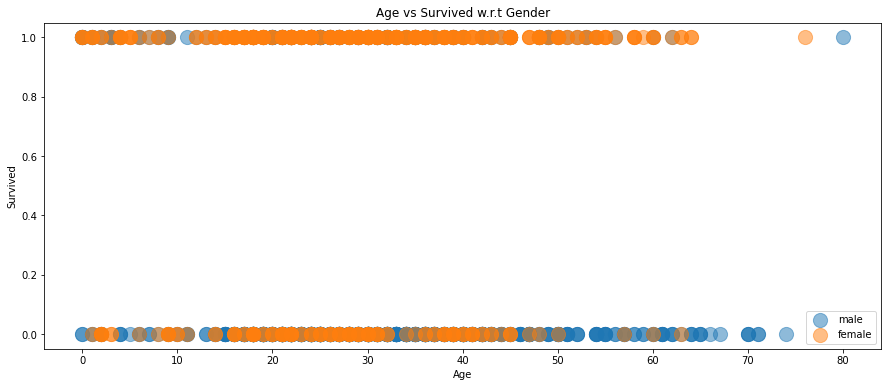

In [22]:
# Khảo sát phân bố của thuộc tính Tuổi và Sống sót hằng năm theo Giới tính
plt.figure(1, figsize = (15,6))
for Sex in ['male', 'female']:
    plt.scatter(x='Age', y='Survived', data = df[df['Sex'] == Sex], s=200, alpha=0.5, label= Sex)
plt.xlabel('Age'), plt.ylabel('Survived')
plt.title('Age vs Survived w.r.t Gender')
plt.legend()
plt.show()

In [23]:
# Sử dụng ELBOW để xác định số cụm cần thiết
X1 = df[['Age', 'Survived']].iloc[:, :].values
inertia = []
for n in range(1, 11):
    algorithm = KMeans(n_clusters = n, init='random')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

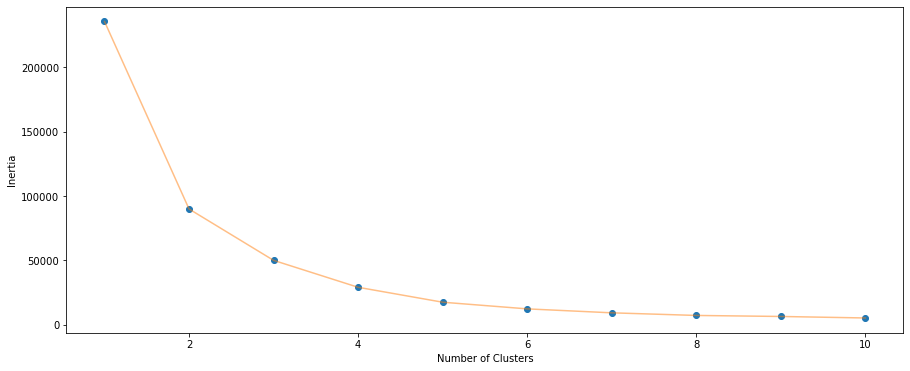

In [24]:
# Vẽ biểu đồ biểu diễn giá trị Inertia, theo từng nhóm gom cụm k
plt.figure(1, figsize=(15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

In [25]:
# Gom cụm dữ liệu Tuổi và Số điểm mua sắm
algorithm = KMeans(n_clusters=4, init='random')
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

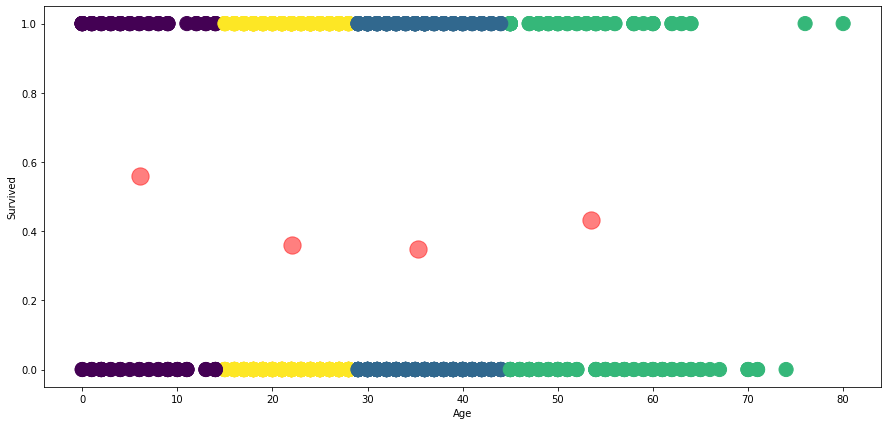

In [26]:
# BIỂU DIỄN KẾT QUẢ GOM CỤM BẰNG ĐIỂM SỐ
plt.figure(1, figsize=(15,7))
plt.clf()
plt.scatter(x='Age', y='Survived', data=df, c=labels1, s=200)
plt.scatter(x=centroids1[:, 0], y=centroids1[:,1], s=300, c='red', alpha=0.5)
plt.ylabel('Survived'), plt.xlabel('Age')
plt.show()

In [27]:
# 8. ĐÁNH GIÁ KẾT QỦA GOM CỤM BẰNG HỆ SỐ DÁNG ĐIỆU (SILHOUETTE COEFFICIENT)
metrics.silhouette_score(X1, labels1, metric='euclidean')

0.5482838629126631